该BaseLine Model使用UNSW-NB15数据集，直接使用数据集中已完成特征工程的部分（即CSV文件）。

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt
import pickle

### 读取数据

In [3]:
Y_train_bin = np.load(r'npy_file/Y_train_bin.npy')
# Y_train_mul = np.load(r'npy_file/Y_train_mul.npy')
X_train = np.load(r'npy_file/X_train.npy')

Y_test_bin = np.load(r'npy_file/Y_test_bin.npy')
# Y_test_mul = np.load(r'npy_file/Y_test_mul.npy')
X_test = np.load(r'npy_file/X_test.npy')

Y_dev_bin = np.load(r'npy_file/Y_dev_bin.npy')
# Y_dev_mul = np.load(r'npy_file/Y_dev_mul.npy')
X_dev = np.load(r'npy_file/X_dev.npy')

In [3]:
model = keras.Sequential([
    tf.keras.Input(shape=(202,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=2048, activation=keras.activations.elu,kernel_initializer='he_normal',),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=1024, activation=keras.activations.elu,kernel_initializer='he_normal',),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=1024, activation=keras.activations.elu,kernel_initializer='he_normal',),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=512, activation=keras.activations.elu,kernel_initializer='he_normal',),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=256, activation=keras.activations.elu,kernel_initializer='he_normal',),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=128, activation=keras.activations.elu,kernel_initializer='he_normal',),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=64, activation=keras.activations.elu,kernel_initializer='he_normal',),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=1, activation=keras.activations.sigmoid),
])

In [4]:
model.compile(loss='MSE',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
              
)
model.build(input_shape=[None,202])
model.load_weights(r'results0825\weights.200-0.0052.hdf5')

In [5]:
CHECKPOINT_PATH = './weights.{epoch:03d}-{val_loss:.4f}.hdf5' 
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=CHECKPOINT_PATH,
                                save_weights_only=True,
                                verbose=1)

history = model.fit(x=X_train,y=Y_train_bin,
                    batch_size=1000,
                    initial_epoch=200,
                    epochs=205,
                    validation_data=(X_test,Y_test_bin),
                    callbacks=[cp_callback],)

Epoch 201/205
2490/2490 [==============================] - ETA: 0s - loss: 0.0024 - binary_accuracy: 0.9971 - precision: 0.9908 - recall: 0.9860
Epoch 201: saving model to .\weights.201-0.0023.hdf5
2490/2490 [==============================] - 56s 21ms/step - loss: 0.0024 - binary_accuracy: 0.9971 - precision: 0.9908 - recall: 0.9860 - val_loss: 0.0023 - val_binary_accuracy: 0.9972 - val_precision: 0.9931 - val_recall: 0.9848
Epoch 202/205
2489/2490 [============================>.] - ETA: 0s - loss: 0.0018 - binary_accuracy: 0.9977 - precision: 0.9928 - recall: 0.9892
Epoch 202: saving model to .\weights.202-0.0023.hdf5
2490/2490 [==============================] - 53s 21ms/step - loss: 0.0018 - binary_accuracy: 0.9977 - precision: 0.9928 - recall: 0.9892 - val_loss: 0.0023 - val_binary_accuracy: 0.9969 - val_precision: 0.9864 - val_recall: 0.9895
Epoch 203/205
2490/2490 [==============================] - ETA: 0s - loss: 0.0014 - binary_accuracy: 0.9981 - precision: 0.9930 - recall: 0.99

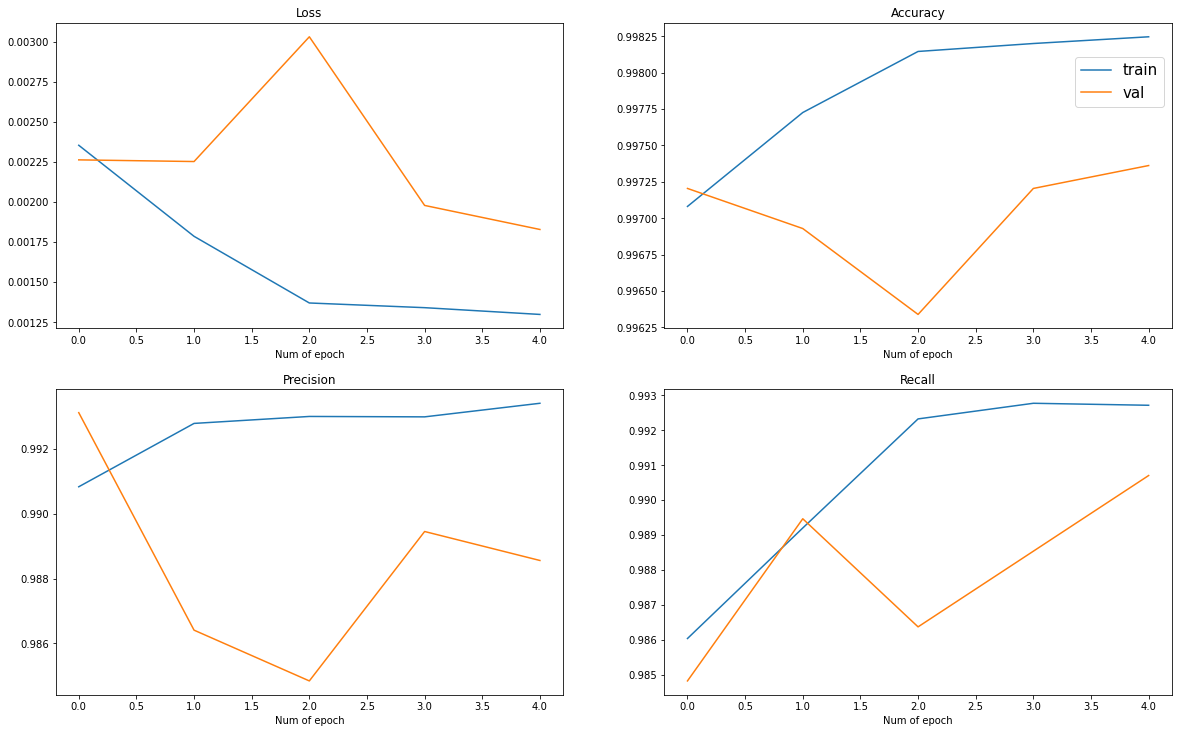

In [6]:
history_dict = history.history

fig = plt.figure(figsize=(20,20*0.618))
plt.subplot(2,2,1)
plt.title('Loss')
plt.xlabel('Num of epoch')
plt.plot(history_dict['loss'],label='train')
plt.plot(history_dict['val_loss'],label='val')
plt.subplot(2,2,2)
plt.title('Accuracy')
plt.xlabel('Num of epoch')
plt.plot(history_dict['binary_accuracy'],label='train')
plt.plot(history_dict['val_binary_accuracy'],label='val')
plt.subplot(2,2,3)
plt.title('Precision')
plt.xlabel('Num of epoch')
plt.plot(history_dict['precision'],label='train')
plt.plot(history_dict['val_precision'],label='val')
plt.subplot(2,2,4)
plt.title('Recall')
plt.xlabel('Num of epoch')
plt.plot(history_dict['recall'],label='train')
plt.plot(history_dict['val_recall'],label='val')

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(0.9, 0.85), fontsize = 15)